# **SHapley Additive exPlanations Model Interpretability Analysis for Top2Vec Natural Language Processing**: Part 4

## **III. Proposed Methods**: continued

## **III.C. Time Series Analysis:**

### **INSTALLATIONS**

In [ ]:
!pip3 install iexfinance
!pip install config
!pip install influxdb
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 1.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.6 MB/s 
     |████████████████████████████████| 20.9 MB 1.6 MB/s 
     |████████████████████████████████| 1.1 MB 62.9 MB/s 
     |████████████████████████████████| 7.8 MB 71.4 MB/s 
     |████████████████████████████████| 16.6 MB 48.9 MB/s 


### **IMPORTED LIBRARIES**

In [ ]:
import pandas as pd  # To read the csv file to a data frame.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from matplotlib.dates import DateFormatter
import seaborn as sns
import earthpy as et

import config
import os
from datetime import datetime

# **UPLOAD DATA**

In [ ]:
df_Cleaned_Depression_PCS_Data = pd.read_csv ('/Cleaned_Depression_PCS_Data.csv')
df_Cleaned_Depression_PCS_Data

,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic,Processed_comments
0,"I just started my OCONUS assignment, and I've ...",1468399483,pcs,"' started bonus assignment , month . want sepa..."
1,I was active duty and palace chased. I actuall...,1468375101,depression,' active duty palace chased . actually 30 % co...
2,Nonner that’s gonna get paidddd after I get ou...,1585244281,pcs,'none gon na get paid get lmaz '
3,That's the craziest thing I've ever heard! Did...,1585243449,pcs,'that craziest thing ever heard ! sub last tim...
4,How did you end up making that happen?,1624191646,pcs,'how end making happen ? '
...,...,...,...,...
226,•Kicked out of Florida International Universit...,1641216805,pcs,`` * kicked florida international university f...
227,"Don't answer the phone, wait a couple hours, t...",1641207022,pcs,"'do answer phone , wait couple hours , text ba..."
228,I like my reason but part of it is that I feel...,1578528305,depression,' like reason part feel inadequate tumbling du...
229,At least he isn't wearing his area badge.,1576095618,pcs,'at least wearing area badge . '


# **PROPROCESSSING TIME SERIES DATA**

**Preprocessing time data**

Convert Epoch time stamp Date Time.

In [ ]:
df_Cleaned_Depression_PCS_Data["date_time"] = pd.to_datetime(df_Cleaned_Depression_PCS_Data['UTC_dates_from_Depression_or_PCS_Topics'], unit = 's')
df_date_sorted_data = df_Cleaned_Depression_PCS_Data.sort_values('UTC_dates_from_Depression_or_PCS_Topics', ascending = True)
df_date_sorted_data

,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic,Processed_comments,date_time
144,"Fucking Deid. I went through their x-ray, they...",1450110801,pcs,"'fucking dead . went x ray , saw external had ...",2015-12-14 16:33:21
143,If I got away with telling my entire squadron ...,1450117797,depression,'if got away telling entire squadron go fuck c...,2015-12-14 18:29:57
154,OP. There are a lot of shitty replies in this ...,1454900378,pcs,`` op . lot shift replies thread . let please ...,2016-02-08 02:59:38
153,There are a decent number of jobs that don't r...,1454913258,depression,'there decent number jobs require clearance . ...,2016-02-08 06:34:18
148,McKay and Shep were my main reasons for eating...,1456091501,pcs,'may she main reasons eating entire atlantis s...,2016-02-21 21:51:41
...,...,...,...,...,...
227,"Don't answer the phone, wait a couple hours, t...",1641207022,pcs,"'do answer phone , wait couple hours , text ba...",2022-01-03 10:50:22
226,•Kicked out of Florida International Universit...,1641216805,pcs,`` * kicked florida international university f...,2022-01-03 13:33:25
230,THIS. Our officers/SELs make all so many decis...,1642434972,depression,'this . officers self make many decisions zero...,2022-01-17 15:56:12
112,Which is hilarious because I've been to public...,1643659046,depression,'which hilarious public gun ranges state limit...,2022-01-31 19:57:26


Convert date/time format to month/year format.

In [ ]:
# Adds a month/year column into the dataframe.
df_date_sorted_data["month_year"] = df_date_sorted_data['date_time'].dt.to_period('M')
df_date_sorted_data   

,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic,Processed_comments,date_time,month_year
144,"Fucking Deid. I went through their x-ray, they...",1450110801,pcs,"'fucking dead . went x ray , saw external had ...",2015-12-14 16:33:21,2015-12
143,If I got away with telling my entire squadron ...,1450117797,depression,'if got away telling entire squadron go fuck c...,2015-12-14 18:29:57,2015-12
154,OP. There are a lot of shitty replies in this ...,1454900378,pcs,`` op . lot shift replies thread . let please ...,2016-02-08 02:59:38,2016-02
153,There are a decent number of jobs that don't r...,1454913258,depression,'there decent number jobs require clearance . ...,2016-02-08 06:34:18,2016-02
148,McKay and Shep were my main reasons for eating...,1456091501,pcs,'may she main reasons eating entire atlantis s...,2016-02-21 21:51:41,2016-02
...,...,...,...,...,...,...
227,"Don't answer the phone, wait a couple hours, t...",1641207022,pcs,"'do answer phone , wait couple hours , text ba...",2022-01-03 10:50:22,2022-01
226,•Kicked out of Florida International Universit...,1641216805,pcs,`` * kicked florida international university f...,2022-01-03 13:33:25,2022-01
230,THIS. Our officers/SELs make all so many decis...,1642434972,depression,'this . officers self make many decisions zero...,2022-01-17 15:56:12,2022-01
112,Which is hilarious because I've been to public...,1643659046,depression,'which hilarious public gun ranges state limit...,2022-01-31 19:57:26,2022-01


**Preprocessing topic data**

In [ ]:
# Convert Topic column from string to category type variable.
df_date_sorted_data['Topic'] = df_date_sorted_data['Topic'].astype('category')
df_date_sorted_data

,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic,Processed_comments,date_time,month_year
144,"Fucking Deid. I went through their x-ray, they...",1450110801,pcs,"'fucking dead . went x ray , saw external had ...",2015-12-14 16:33:21,2015-12
143,If I got away with telling my entire squadron ...,1450117797,depression,'if got away telling entire squadron go fuck c...,2015-12-14 18:29:57,2015-12
154,OP. There are a lot of shitty replies in this ...,1454900378,pcs,`` op . lot shift replies thread . let please ...,2016-02-08 02:59:38,2016-02
153,There are a decent number of jobs that don't r...,1454913258,depression,'there decent number jobs require clearance . ...,2016-02-08 06:34:18,2016-02
148,McKay and Shep were my main reasons for eating...,1456091501,pcs,'may she main reasons eating entire atlantis s...,2016-02-21 21:51:41,2016-02
...,...,...,...,...,...,...
227,"Don't answer the phone, wait a couple hours, t...",1641207022,pcs,"'do answer phone , wait couple hours , text ba...",2022-01-03 10:50:22,2022-01
226,•Kicked out of Florida International Universit...,1641216805,pcs,`` * kicked florida international university f...,2022-01-03 13:33:25,2022-01
230,THIS. Our officers/SELs make all so many decis...,1642434972,depression,'this . officers self make many decisions zero...,2022-01-17 15:56:12,2022-01
112,Which is hilarious because I've been to public...,1643659046,depression,'which hilarious public gun ranges state limit...,2022-01-31 19:57:26,2022-01


**Processing data for analysis**

Loop code to generate lists that will be input into a dataframe and used to count the number of each topic category between pcs and depression within the topic column.

In [ ]:
# Sets the topic dataframe column as a list.
topic_column_list = df_date_sorted_data['Topic'].tolist()
print(topic_column_list) # Validates list. 
# Initializes an empty list for PCS positive comment rows.
pcs_positive_list = [] 
# Initializes an empty list for depression positive comment rows.
depression_positive_list = [] 

# For loop that iterates through each index in the topic column list.
for Topic_column_index in topic_column_list:
  # An If conditional for when a pcs comment in the topic column list is processed. 
  if Topic_column_index == 'pcs':
    # Adds a 1 numerical for when there's a pcs comment in the topic column list.
    pcs_positive_list.append(1)
  # An Else conditional for when a pcs comment in the topic column list is processed.
  else:
    # Adds a 0 numerical for when there's a pcs comment in the topic column list.
    pcs_positive_list.append(0)

# For loop that iterates through each index in the topic column list.
for Topic_column_index in topic_column_list:
  # An If conditional for when a depression comment in the topic column list is processed. 
  if Topic_column_index == 'depression':
    # Adds a 1 numerical for when there's a depression comment in the topic column list.
    depression_positive_list.append(1)
  # An Else conditional for when a depression comment in the topic column list is processed.
  else:
    # Adds a 0 numerical for when there's a depression comment in the topic column list.
    depression_positive_list.append(0)



['pcs', 'depression', 'pcs', 'depression', 'pcs', 'depression', 'pcs', 'pcs', 'depression', 'depression', 'pcs', 'depression', 'pcs', 'pcs', 'depression', 'depression', 'depression', 'pcs', 'pcs', 'depression', 'depression', 'depression', 'depression', 'pcs', 'depression', 'depression', 'pcs', 'depression', 'pcs', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'pcs', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'pcs', 'depression', 'pcs', 'pcs', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'depression', 'pcs', 'pcs', 'depression', 'depression', 'depression', 'depression', 'depression', 'pcs', 'depression', 'depression', 'depression', 'depression', 'depression', 'pcs', 'pcs', 'pcs', 'depression', 'depression', 'pcs', 'depr

**Data Grouping**

In [ ]:
# Adds columns and lists to dictionary that will be converted to a dataframe.
processed_month_comment_pcs_depression_data = {'Month_in_Year': df_date_sorted_data['month_year'].tolist(),
                                               'Comment_Topic': df_date_sorted_data['Topic'].tolist(), # 'Comments_per_Month_in_Year'
                                               'PCS_Comment?_(Yes=1,No=0)': pcs_positive_list, # 'PCS_Comments_per_Month_in_Year'
                                               'Depression_Comment?_(Yes=1,No=0)': depression_positive_list, # 'Depression_Comments_per_Month_in_Year'
                                               'Processed_comments': df_date_sorted_data['Processed_comments'].tolist()	
                                               }

In [ ]:
# Converts dictionary to a dataframe.
df_processed_month_comment_pcs_depression_data = pd.DataFrame(processed_month_comment_pcs_depression_data)
df_processed_month_comment_pcs_depression_data

,Month_in_Year,Comment_Topic,"PCS_Comment?_(Yes=1,No=0)","Depression_Comment?_(Yes=1,No=0)",Processed_comments
0,2015-12,pcs,1,0,"'fucking dead . went x ray , saw external had ..."
1,2015-12,depression,0,1,'if got away telling entire squadron go fuck c...
2,2016-02,pcs,1,0,`` op . lot shift replies thread . let please ...
3,2016-02,depression,0,1,'there decent number jobs require clearance . ...
4,2016-02,pcs,1,0,'may she main reasons eating entire atlantis s...
...,...,...,...,...,...
226,2022-01,pcs,1,0,"'do answer phone , wait couple hours , text ba..."
227,2022-01,pcs,1,0,`` * kicked florida international university f...
228,2022-01,depression,0,1,'this . officers self make many decisions zero...
229,2022-01,depression,0,1,'which hilarious public gun ranges state limit...


Group all comment data columns in a dataframe by month/year.




In [ ]:
# Group all dataframe columns with multiple aggregations by the same Month_in_Year column. 
df_comments_pcs_depression_per_month_year_incomplete = df_processed_month_comment_pcs_depression_data.groupby('Month_in_Year').agg(Comments_per_Month_in_Year = ('Comment_Topic', 'count'),
                                                                                                                        PCS_Comments_per_Month_in_Year = ('PCS_Comment?_(Yes=1,No=0)', 'sum'),
                                                                                                                        Depression_Comments_per_Month_in_Year = ('Depression_Comment?_(Yes=1,No=0)', 'sum'),
                                                                                                                        Monthly_Comments_Combined = ('Processed_comments', 'sum')
                                                                                                                        )
df_comments_pcs_depression_per_month_year_incomplete


,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined
Month_in_Year,,,,
2015-12,2,1,1,"'fucking dead . went x ray , saw external had ..."
2016-02,3,2,1,`` op . lot shift replies thread . let please ...
2016-03,6,3,3,'that mentality ended promoting buddy mine stu...
2016-04,2,1,1,'but get ccf ? '' month thing seen firetruck c...
2016-06,2,1,1,' deleted ''well meant made af '
...,...,...,...,...
2021-08,3,0,3,"'waste words ssd space . ''oh yeah , forgot ca..."
2021-09,2,0,2,' imagine young airman spending hundreds dolla...
2021-10,4,3,1,'shaped like pyramid scheme ''another question...


In [ ]:
# Need to transfer df_comments_pcs_depression_per_month_year to csv format.
# Dataframe has missing months due to web scraped data that didn't find relevant comments from topic model clusters for those months.
# 1. Copy and paste output from to_csv() function to Notepad app to save into a .txt format.
# 2. .txt file can be opened in the Microsoft Excel app and saved into a .csv format
# 3. Data for months with no comments in either topic category will be manually filled in with zeroes.
# 4. Data can be reimported from a csv format for Time Series and Correlation analysis.
df_comments_pcs_depression_per_month_year_incomplete.to_csv() # Incomplete data set.

'Month_in_Year,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined\n2015-12,2,1,1,"\'fucking dead . went x ray , saw external had show scanner swore dvds needed rampage . pull drive , insist seeing , recap bag . apparently enclosure read write head enough identify . said , encrypted porn had , bright customs . totallythebible.pdf , size : 500gb . \'\'if got away telling entire squadron go fuck christmas party , think fine . bonus : also ended several drunken conversations various group commanders told much hated base ( wilson ) . yeah , cool . \'"\n2016-02,3,2,1,"`` op . lot shift replies thread . let please tell would happen . log pp , sci see cm . tech like screen . fill gad7 ( anxiety questionnaire ) ph9 ( depression ) google get idea questions . answer honestly . negatively effected . doctor discuss different approaches handle situation . whether mens , talking mental health , chaplain , base counseling . gives m

In [ ]:
df_comments_pcs_depression_per_month_year = pd.read_csv ('/comments_pcs_depression_per_month_year.csv', 
                                                         header=0, 
                                                         index_col=0, 
                                                         parse_dates=False, 
                                                         squeeze=True
                                                         )
df_comments_pcs_depression_per_month_year

,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined
Month_in_Year,,,,
2015-12,2,1,1,"'fucking dead . went x ray , saw external had ..."
2016-01,0,0,0,NaN
2016-02,3,2,1,`` op . lot shift replies thread . let please ...
2016-03,6,3,3,'that mentality ended promoting buddy mine stu...
2016-04,2,1,1,'but get ccf ? '' month thing seen firetruck c...
...,...,...,...,...
2021-09,2,0,2,' imagine young airman spending hundreds dolla...
2021-10,4,3,1,'shaped like pyramid scheme ''another question...
2021-11,0,0,0,NaN


# **I.V. Results and Analysis**

# **CORRELATION ANALYSIS**

Pearson's Correlation Coefficient Heatmap
* Tutorial Site References:
  * [Pearson Coefficient of Correlation with Python](https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04) by Joseph Magiya
  * [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) by pandas documentation




In [ ]:
import seaborn as sb

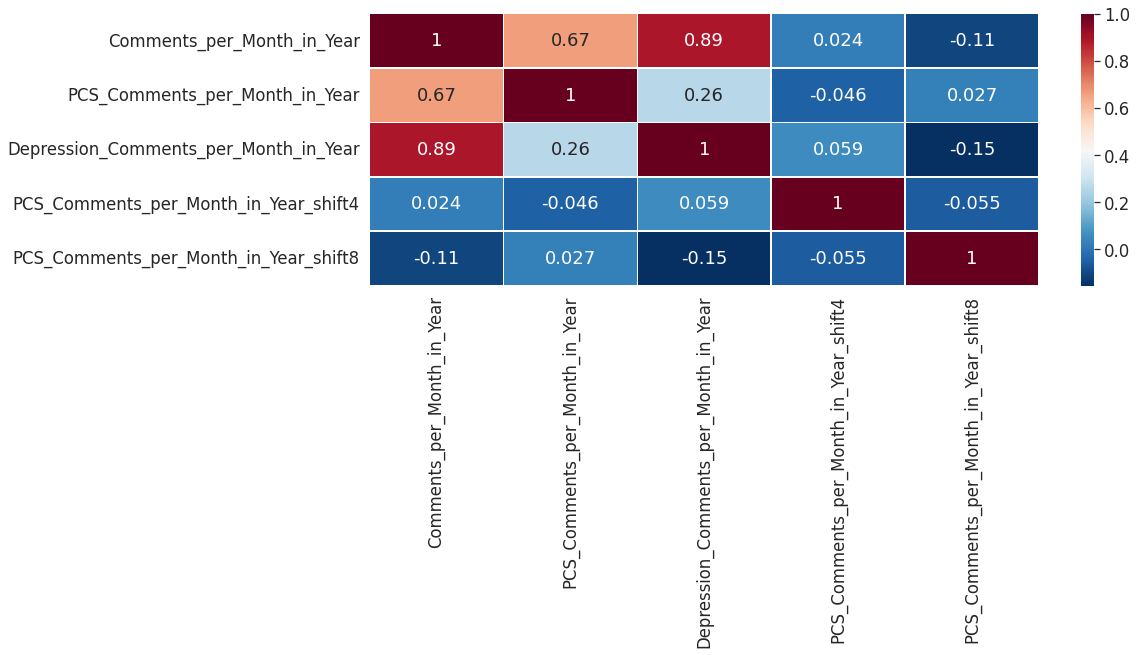

In [ ]:
pearsoncorr = df_comments_pcs_depression_per_month_year.corr(method='pearson')
pearsoncorr
fig, ax = plt.subplots(figsize=(15, 5))
sb.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.5)

# **REGRESSION ANALYSIS**

**Linear Regression**

In [ ]:
# Imported libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
df_comments_pcs_depression_per_month_year.drop(df_comments_pcs_depression_per_month_year.index[0:8], inplace=True)

In [ ]:
x = df_comments_pcs_depression_per_month_year[['PCS_Comments_per_Month_in_Year','PCS_Comments_per_Month_in_Year_shift4','PCS_Comments_per_Month_in_Year_shift8']]
y = df_comments_pcs_depression_per_month_year['Depression_Comments_per_Month_in_Year']
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=2)


In [ ]:
# create linear regression object
reg = linear_model.LinearRegression()
# train the model using the training sets
linear_regression_model = reg.fit(x_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(x_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')

Coefficients:  [ 0.18690038 -0.03587604 -0.22723734]
Variance score: 0.08254539838888719


In [ ]:
predictions = reg.predict(x)
linear_regression_model.score(x_test, y_test)
linear_regression_model = reg.fit(x, y)
linear_regression_model.score(x, y)

0.07663007312968872

In [ ]:
linear_regression_model.score(x_test, y_test)

0.1409176126596482